# Analysis of 20 most popular users on Twitter

### Content
+ Introduction: What is Twitter?
+ Data description
+ Data preparation

# Introduction: What is Twitter?

Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Registered users can post, like and retweet tweets, but unregistered users can only read them. Users access Twitter through its website interface, through Short Message Service (SMS) or its mobile-device application software ("app"). Twitter, Inc. is based in San Francisco, California, and has more than 25 offices around the world. Tweets were originally restricted to 140 characters, but was doubled to 280 for non-CJK languages in November 2017. Audio and video tweets remain limited to 140 seconds for most accounts.

Twitter was created by Jack Dorsey, Noah Glass, Biz Stone, and Evan Williams in March 2006 and launched in July of that year. By 2012, more than 100 million users posted 340 million tweets a day, and the service handled an average of 1.6 billion search queries per day. In 2013, it was one of the ten most-visited websites and has been described as "the SMS of the Internet". As of 2018, Twitter had more than 321 million monthly active users.
    
    (the information was taken from Wikipedia.com)

# Data Description 

Twitter is one of the most popular social networks in the world, but who among millions of people is the most popular? 
This project is aimed at analyzing the most readable users and is based on a ready-made dataset. 
    (source: https://www.kaggle.com/mmmarchetti/tweets-dataset)

### The attributes:
+ Name (Personal information)
+ ID (username)
+ Language (of the post)
+ Time (When the twit was published)
+ Followers (number of followers)
+ Likes (Number of likes)
+ Shares (Number of shares)
+ Hashtags (Which hashtags are used in posts)

Dataset size: over 50,000.


In [ ]:
#### The 3 objectives of this analysis:
1. Compare the number of likes with the number of followers
2. Find the most liked or shared posts on the user's page.
3. Define the most liked posts on each user’s page

# Data Preparation

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('tweets.csv')
df[:]

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655
...,...,...,...,...,...,...,...,...,...,...
52537,ddlovato,Life couldn't be better right now. 😊,NaN,06/01/2015 23:10,5.526030e+17,en,NaN,NaN,32799,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,NaN,06/01/2015 02:17,5.522880e+17,en,NaN,NaN,21709,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",NaN,05/01/2015 03:42,5.519470e+17,en,NaN,NaN,25269,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,NaN,05/01/2015 00:06,5.518920e+17,und,NaN,NaN,15985,10456


In [9]:
data_valid = pd.DataFrame() #checking for null values
data_valid['Columns'] = list(df.columns)
data_valid['Count'] = list(df.count())
data_valid[:]

,Columns,Count
0,author,52542
1,content,52542
2,country,36
3,date_time,52542
4,id,52542
5,language,52542
6,latitude,1
7,longitude,1
8,number_of_likes,52542
9,number_of_shares,52542


For the puprose of our analysis we don't need columns such as country, latitude and longtitude, we will drop them because of this and also because most of the values are missing. 

In [10]:
df = df.drop(columns = ['country', 'latitude', 'longitude'])
df[:]

,author,content,date_time,id,language,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,12/01/2017 19:52,8.196330e+17,en,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,11/01/2017 08:38,8.191010e+17,en,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,11/01/2017 02:52,8.190140e+17,en,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,11/01/2017 02:44,8.190120e+17,en,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,10/01/2017 05:22,8.186890e+17,en,17620,4655
...,...,...,...,...,...,...,...
52537,ddlovato,Life couldn't be better right now. 😊,06/01/2015 23:10,5.526030e+17,en,32799,23796
52538,ddlovato,First Monday back in action. I'd say 21.6 mile...,06/01/2015 02:17,5.522880e+17,en,21709,12511
52539,ddlovato,"Crime shows, buddy, snuggles = the perfect Sun...",05/01/2015 03:42,5.519470e+17,en,25269,15583
52540,ddlovato,❄️ http://t.co/sHCFdPpGPa,05/01/2015 00:06,5.518920e+17,und,15985,10456


Language on some of the tweets cannot be identified or just missing at all, since such data entries marked as und, we should substitute them by NaN.

In [15]:
df.replace("und", np.nan, inplace = True)
data_valid = pd.DataFrame() 
data_valid['Columns'] = list(df.columns)
data_valid['Count'] = list(df.count())
data_valid[:]

,Columns,Count
0,author,52542
1,content,52542
2,date_time,52542
3,id,52542
4,language,49300
5,number_of_likes,52542
6,number_of_shares,52542


## Data Visualization

### Q1: Find the most liked or shared posts on the user's page.

In [49]:
#creating a dataframe only for most liked posts of a person
df2 = df
df2 = df.sort_values(by=['number_of_likes'], ascending = False).groupby(['author']) #sorting and grouping by author
df2 = df2.first() #and then taking only first values
df2[:]

,content,date_time,id,language,number_of_likes,number_of_shares
author,,,,,,
ArianaGrande,https://t.co/FL1tOHAZvN,28/12/2016 04:00,8.139580e+17,en,328838,152045
BarackObama,Side-by-side for 24 years. Here's to many more...,03/10/2016 18:24,7.830100e+17,en,316831,126279
Cristiano,🏆✌🏼️🇵🇹 https://t.co/6Qvd9yKpUD,11/07/2016 00:31,7.522990e+17,en,198375,112738
KimKardashian,family https://t.co/C160vg1Mcn,03/01/2017 18:59,8.163580e+17,en,377769,117645
TheEllenShow,Looks like it’s just us now. https://t.co/JFGO...,07/01/2017 00:23,8.175270e+17,en,149534,60402
Twitter,Starting in 🇦🇺 on 3/21 and moving across the 🌍...,20/03/2016 21:00,7.116590e+17,en,184768,114311
YouTube,.@JustinBieber and @MajorLazer bring the heat ...,24/07/2016 17:00,7.572590e+17,en,51945,28430
britneyspears,My son is Lord Frieza 💜💜💜💜 https://t.co/J0aaUm...,12/10/2016 18:18,7.862700e+17,en,46706,24954
cnnbrk,US Army says it will not allow proposed route ...,04/12/2016 22:16,8.055360e+17,en,19638,12678


In [48]:
#creating a dataframe only for most shared posts of a person
df3 = df
df3 = df.sort_values(by=['number_of_shares'], ascending = False).groupby(['author']) #sorting and grouping by author
df3 = df3.first() #and then taking only first values
df3[:]

,content,date_time,id,language,number_of_likes,number_of_shares
author,,,,,,
ArianaGrande,https://t.co/FL1tOHAZvN,28/12/2016 04:00,8.139580e+17,ja,328838,152045
BarackObama,Retweet to spread the word. #LoveWins http://t...,26/06/2015 15:44,6.144590e+17,en,148581,200747
Cristiano,🏆✌🏼️🇵🇹 https://t.co/6Qvd9yKpUD,11/07/2016 00:31,7.522990e+17,en,198375,112738
KimKardashian,Wait it's legit National Snake Day?!?!?They ha...,17/07/2016 23:22,7.548180e+17,en,337383,219062
TheEllenShow,For every tweet and retweet with #BellLetsTalk...,27/01/2016 18:43,6.924180e+17,en,39629,114404
Twitter,Starting in 🇦🇺 on 3/21 and moving across the 🌍...,20/03/2016 21:00,7.116590e+17,en,184768,114311
YouTube,.@JustinBieber and @MajorLazer bring the heat ...,24/07/2016 17:00,7.572590e+17,en,51945,28430
britneyspears,"Wow @SelenaGomez... ""Come &amp; Get It"" on the...",15/04/2013 04:51,3.236600e+17,en,8793,29983
cnnbrk,"Former Cuban leader Fidel Castro has died, sta...",26/11/2016 05:36,8.023860e+17,en,9195,14779


In [51]:
df4 = pd.DataFrame()
df4 = pd.merge(df2[['number_of_likes']], df3[['number_of_shares']], on = 'author')
df4[:]

,number_of_likes,number_of_shares
author,,
ArianaGrande,328838,152045
BarackObama,316831,200747
Cristiano,198375,112738
KimKardashian,377769,219062
TheEllenShow,149534,114404
Twitter,184768,114311
YouTube,51945,28430
britneyspears,46706,29983
cnnbrk,19638,14779


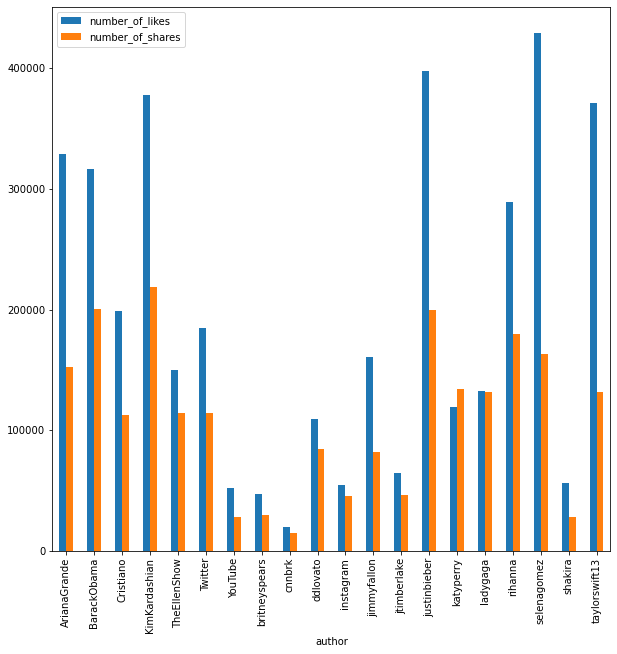

In [54]:
axes = df4.plot.bar(figsize = (10,10))

### Q2: Show increase in the number of posts during 2016 year

In [1]:
from datetime import datetime
temp = list()
for i in df['date_time'] :
    if(datetime.strptime(i[:10], '%d/%m/%y').)
    temp.append(datetime.strptime(i[:10], '%d/%m/%y'))
df['date_time_conv'] = temp
df[:]

SyntaxError: invalid syntax (<ipython-input-1-8cc208e2ff33>, line 4)